# **Polynomial Regression**

# Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n$ th degree polynomial in $x$. It is used when the data points do not follow a linear trend.

### The Equation
The general equation for a polynomial regression model is:
$$y = \beta_0 + \beta_1x + \beta_2x^2 + \dots + \beta_nx^n + \epsilon$$

Where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $\beta_0, \beta_1, \dots, \beta_n$ are the coefficients to be estimated.
- $n$ is the degree of the polynomial.
- $\epsilon$ is the error term.

### Key Concepts
1.  **Degree of Polynomial:** Choosing the right degree is crucial. A low degree might underfit the data, while a very high degree can lead to overfitting.
2.  **Linearity:** Although the relationship between $x$ and $y$ is non-linear, polynomial regression is considered a form of **multiple linear regression** because the model is linear in terms of its coefficients ($\beta$).
3.  **Feature Transformation:** In practice, this is often implemented by transforming the input features into a polynomial feature set (e.g., using `PolynomialFeatures` from Scikit-Learn) and then applying a standard Linear Regression model.


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# generating random numbers for x and y

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2


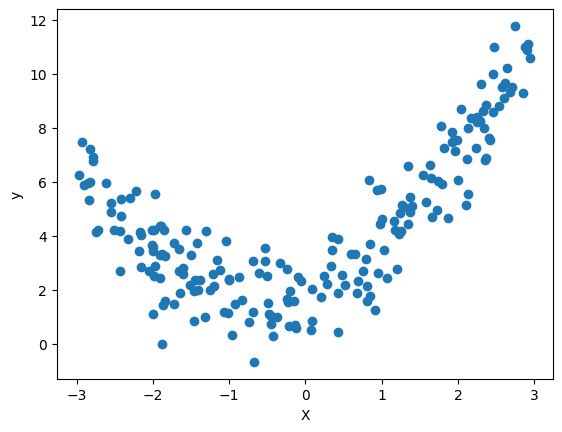

In [ ]:
# plt.plot(X, y,'b.')
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# as you can see down below that there is no linear relation btwn the data points

0.24779072523271028


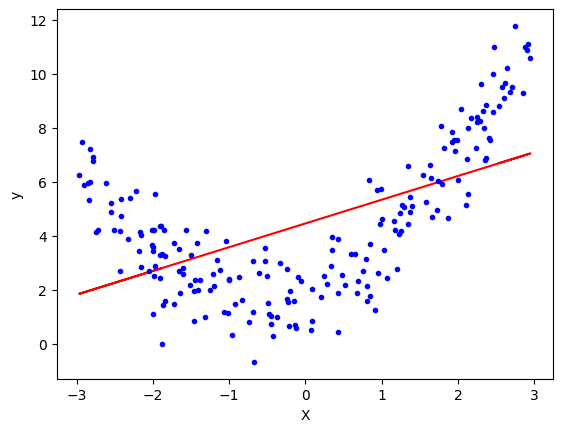

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))     # as you can see the score is very low

# plotting the linear reg on graph
plt.plot(X_train, lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# as you can see down below the predicted values through linear reg is completely wrong


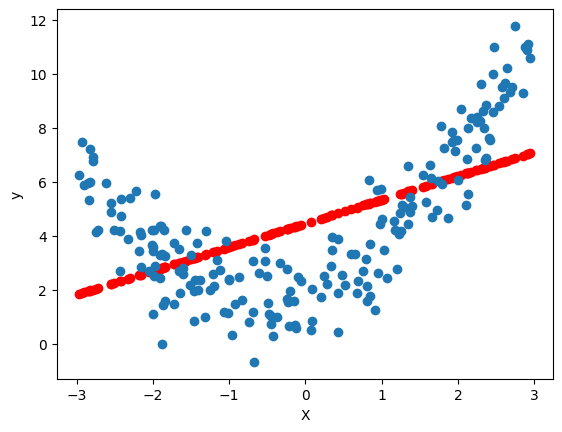

In [22]:
plt.scatter(X_train, lr.predict(X_train), color='r')
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()


### **Applying Polynomial Regression**

[-1.88535583]
[ 1.         -1.88535583  3.55456662]


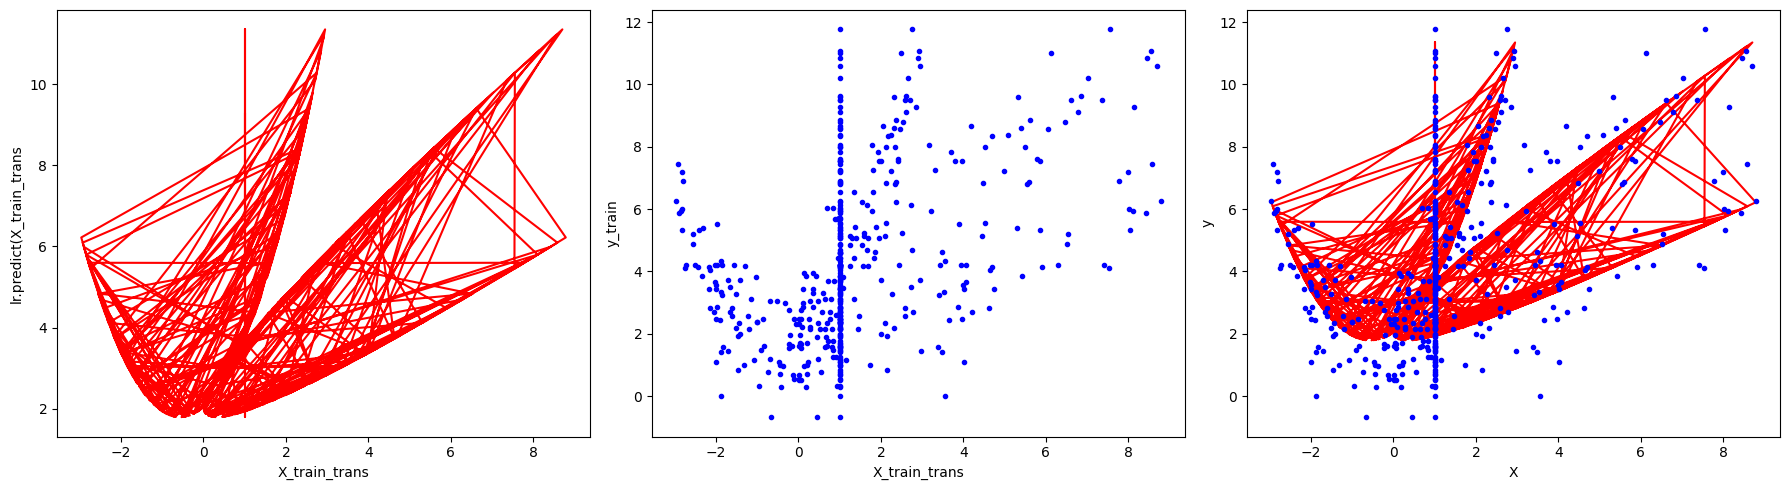

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
# you can change the degree as you like

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# checking how individual data points look after transformation
print(X_train[0])
print(X_train_trans[0])

# using linear regression to make prediction
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

r2_score(y_test,y_pred)     # as you can see the score has increased to 87 % after applying polynomial reg


# ***************************************************************************************************************************
# plotting the graph
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(X_train_trans, lr.predict(X_train_trans), color='r')
plt.xlabel("X_train_trans")
plt.ylabel("lr.predict(X_train_trans")

plt.subplot(132)
plt.plot(X_train_trans, y_train, "b.")
plt.xlabel("X_train_trans")
plt.ylabel("y_train")

plt.subplot(133)
plt.plot(X_train_trans, lr.predict(X_train_trans), color='r')
plt.plot(X_train_trans, y_train, "b.")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()
# ***************************************************************************************************************************



